<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes Tutorial with Python**

Car Acceptability Dataset

*   buying: buying price
*   maint: price of the maintenance
*   doors: number of doors
*   persons: capacity in terms of persons to carry
*   lug_boot: the size of luggage boot
*   safety: estimated safety of the car
*   class: unacceptable, acceptable, good, very good

In [40]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [42]:
# cara 1: pop + insert
col = df.pop("Health_Issues")
df["Health_Issues"] = col


Menaruh kolom health_issues di paling belakang

In [43]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption,Health_Issues
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Other,0,0,NaN
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Service,0,0,NaN
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Office,0,0,Mild
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Other,0,0,Mild
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Student,0,1,Mild


In [44]:
df["Health_Issues"] = df["Health_Issues"].fillna("None")
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption,Health_Issues
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Other,0,0,None
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Service,0,0,None
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Office,0,0,Mild
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Other,0,0,Mild
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Student,0,1,Mild


Mengubah data NaN pada kolom Health_Issues menjadi 'None'

In [45]:
df = df.drop(columns=["ID"])
df.head()


,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption,Health_Issues
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Other,0,0,None
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Service,0,0,None
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Office,0,0,Mild
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Other,0,0,Mild
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Student,0,1,Mild


Drop ID karena tidak digunakan

In [46]:
col_names = ['age', 'gender', 'country', 'daily_coffee_intake', 'caffeine_level_mg', 'sleep_duration_hrs',
             'sleep_quality','BMI','heart_rate','stress_level','physical_activity','occupation','smoking', 'alcohol_consumption', 'health_issues']
df.columns = col_names
print(df.columns)


Index(['age', 'gender', 'country', 'daily_coffee_intake', 'caffeine_level_mg',
       'sleep_duration_hrs', 'sleep_quality', 'BMI', 'heart_rate',
       'stress_level', 'physical_activity', 'occupation', 'smoking',
       'alcohol_consumption', 'health_issues'],
      dtype='object')


### View summary of dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  int64  
 1   gender               10000 non-null  object 
 2   country              10000 non-null  object 
 3   daily_coffee_intake  10000 non-null  float64
 4   caffeine_level_mg    10000 non-null  float64
 5   sleep_duration_hrs   10000 non-null  float64
 6   sleep_quality        10000 non-null  object 
 7   BMI                  10000 non-null  float64
 8   heart_rate           10000 non-null  int64  
 9   stress_level         10000 non-null  object 
 10  physical_activity    10000 non-null  float64
 11  occupation           10000 non-null  object 
 12  smoking              10000 non-null  int64  
 13  alcohol_consumption  10000 non-null  int64  
 14  health_issues        10000 non-null  object 
dtypes: float64(5), int64(4), object(6)
me

### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [48]:
col_names = [
    'age', 'gender', 'country', 'daily_coffee_intake', 'caffeine_level_mg', 'sleep_duration_hrs',
    'sleep_quality','BMI','heart_rate','stress_level','physical_activity','occupation','smoking', 'alcohol_consumption', 'health_issues']

for col in col_names:
    print(df[col].value_counts())

age
18    935
34    354
32    352
37    346
35    338
38    325
31    310
30    310
40    308
36    308
39    304
29    294
33    294
27    291
28    285
43    276
41    276
42    274
25    256
24    229
26    225
44    223
23    221
45    213
46    208
47    194
22    194
49    173
21    171
48    166
20    154
50    137
51    133
19    133
52    114
54    103
53     96
55     84
56     58
57     57
59     52
58     41
60     37
61     25
62     23
63     18
64     14
65     14
66     13
70      8
67      8
68      8
72      7
80      2
71      2
73      2
69      2
77      1
75      1
Name: count, dtype: int64
gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Germany        497
Australia      497
Belgium        497
Netherlands    494
Spain    

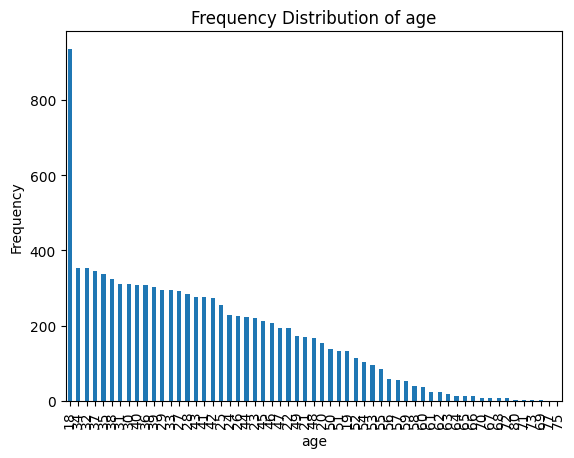

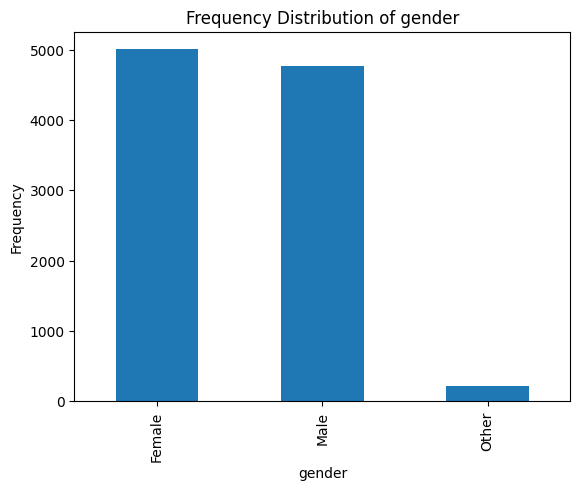

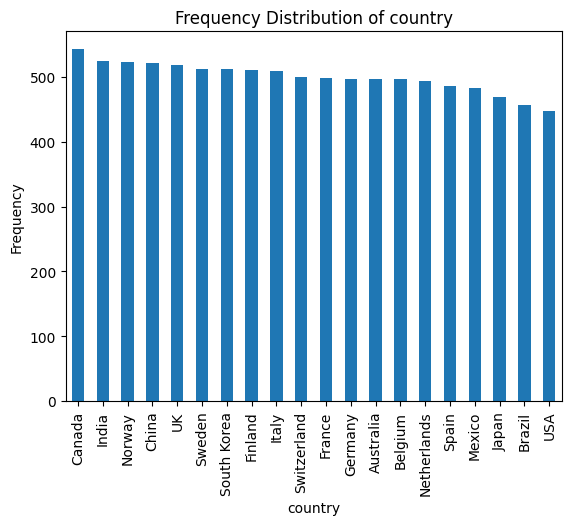

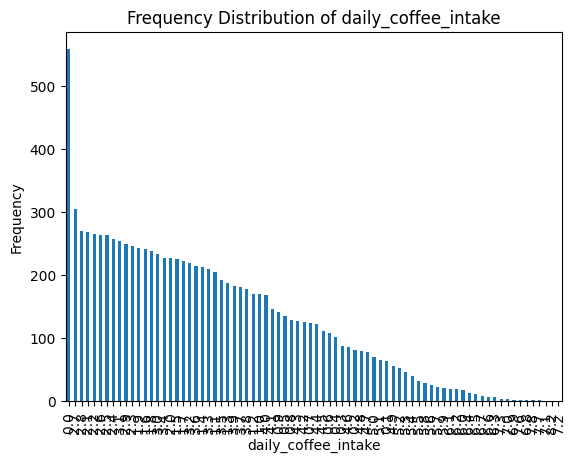

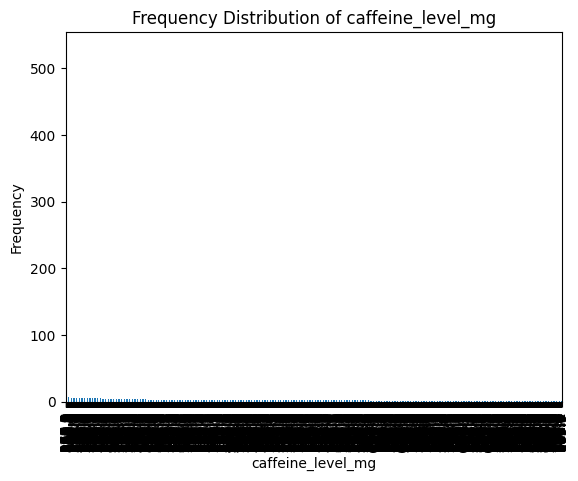

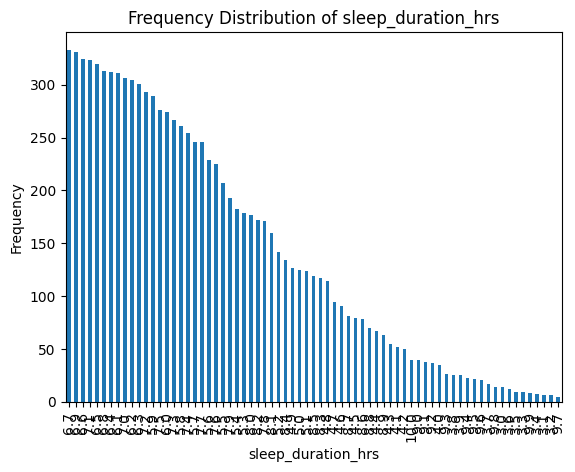

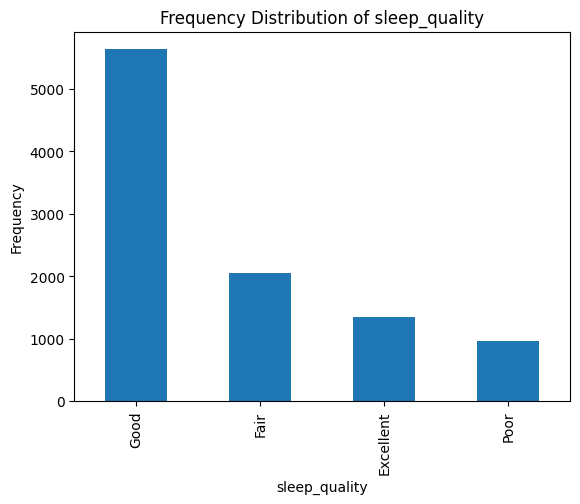

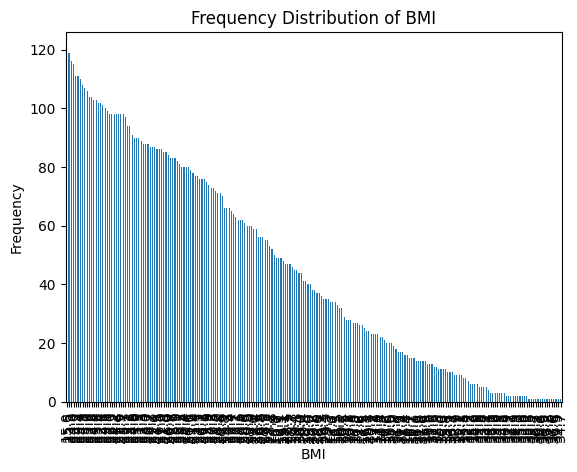

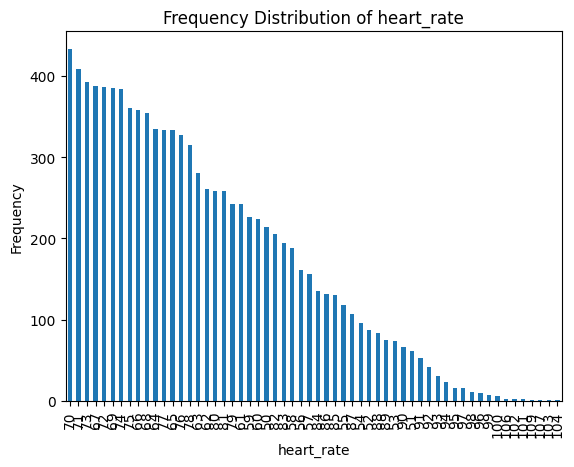

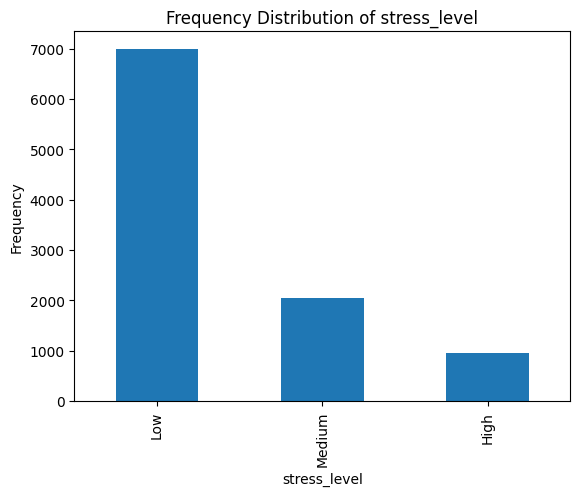

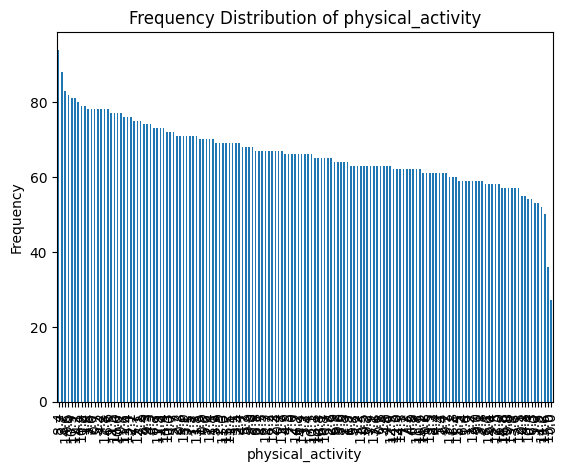

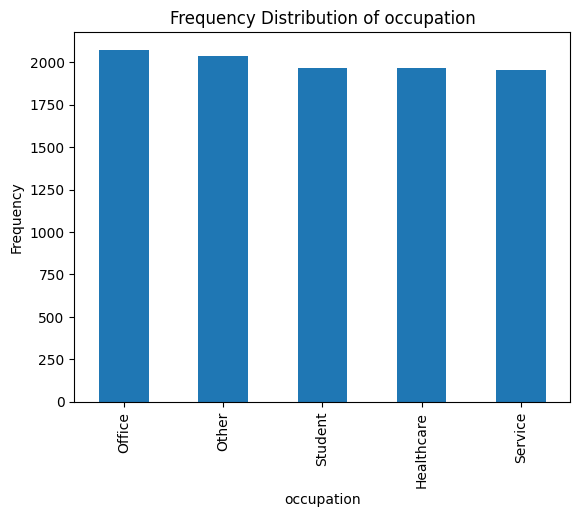

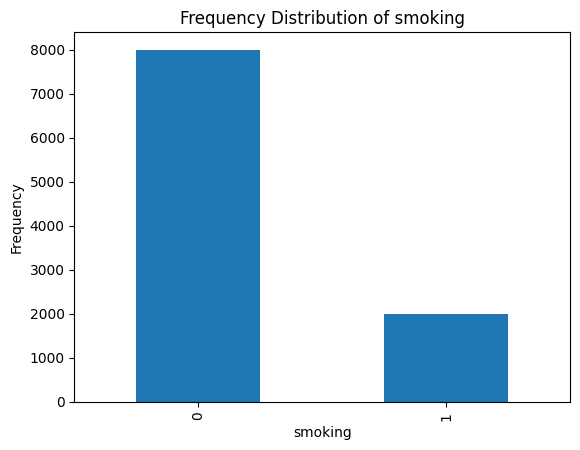

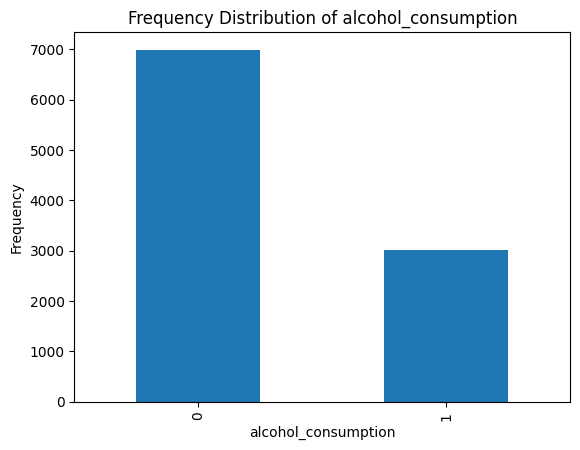

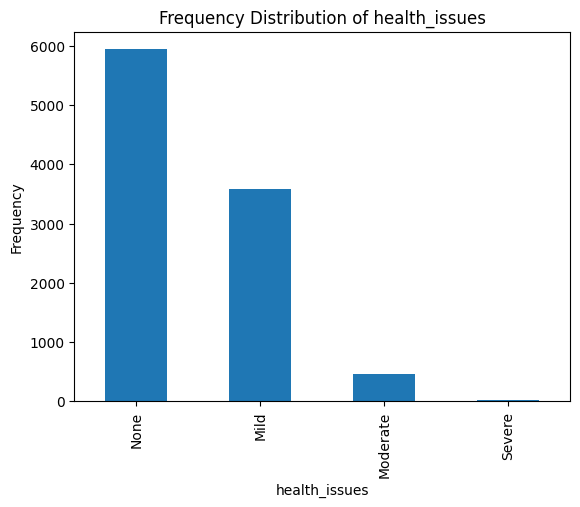

In [49]:
col_names = ['age', 'gender', 'country', 'daily_coffee_intake', 'caffeine_level_mg', 'sleep_duration_hrs',
             'sleep_quality','BMI','heart_rate','stress_level','physical_activity','occupation','smoking', 'alcohol_consumption', 'health_issues']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

### Summary of variables


-

### Explore `class` variable

In [51]:
df['health_issues'].value_counts()

,count
health_issues,
None,5941
Mild,3579
Moderate,463
Severe,17


The `class` target variable is ordinal in nature.

### Missing values in variables

In [52]:
# check missing values in variables

df.isnull().sum()

,0
age,0
gender,0
country,0
daily_coffee_intake,0
caffeine_level_mg,0
sleep_duration_hrs,0
sleep_quality,0
BMI,0
heart_rate,0
stress_level,0


We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

We can see that all  the variables are ordinal categorical data type.

### Encode categorical variables


Now, I will encode the categorical variables.

In [53]:
for column in ['age', 'gender', 'country', 'daily_coffee_intake', 'caffeine_level_mg', 'sleep_duration_hrs',
             'sleep_quality','BMI','heart_rate','stress_level','physical_activity','occupation','smoking', 'alcohol_consumption', 'health_issues']:
  print(df[column].unique())

[40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
[3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.6 7.8 6.8 7.7 6.9]
[328.1  94.1 503.7 ... 460.2 509.1  59.1]
[ 7.5  6.2  5.9  7.3  5.3  6.4  7.8  5.5  7.1  8.1  6.5  6.9  6.6  6.8
  7.7  5.7  5.   6.1  6.   8.3  9.2  7.9  4.8  7.4  7.   7.2  5.8  9.4
  7.6  8.   5.4  8.2  6.3  4.5  9.6  5.2  4.7  4.6  8.7  4.9  9.8  6.7
  5.6  8.8  4.2  8.5 10.   8

In [54]:
# Encoding for ordinal column
gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
country_map = {
 'Australia': 1,
 'Belgium': 2,
 'Brazil': 3,
 'Canada': 4,
 'China': 5,
 'Finland': 6,
 'France': 7,
 'Germany': 8,
 'India': 9,
 'Italy': 10,
 'Japan': 11,
 'Mexico': 12,
 'Netherlands': 13,
 'Norway': 14,
 'South Korea': 15,
 'Spain': 16,
 'Sweden': 17,
 'Switzerland': 18,
 'UK': 19,
 'USA': 20
}
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
occupation_map = {
 'Healthcare': 1,
 'Office': 2,
 'Other': 3,
 'Service': 4,
 'Student': 5
}
health_issues_map = {
 'Mild': 1,
 'Moderate': 2,
 'None': 3,
 'Severe': 4
}

df['gender'] = df['gender'].map(gender_map)
df['country'] = df['country'].map(country_map)
df['sleep_quality'] = df['sleep_quality'].map(sleep_quality_map)
df['stress_level'] = df['stress_level'].map(stress_level_map)
df['occupation'] = df['occupation'].map(occupation_map)
df['health_issues'] = df['health_issues'].map(health_issues_map)

df.sample(n = 5)

,age,gender,country,daily_coffee_intake,caffeine_level_mg,sleep_duration_hrs,sleep_quality,BMI,heart_rate,stress_level,physical_activity,occupation,smoking,alcohol_consumption,health_issues
275,40,2,20,1.5,141.7,7.9,3,20.0,52,1,5.7,1,1,0,3
734,47,1,9,1.4,137.0,5.9,2,25.3,67,2,0.9,5,0,0,1
7237,38,1,1,3.2,302.3,6.3,3,25.4,76,1,2.3,4,1,0,3
5811,52,2,20,4.5,430.4,6.5,3,27.1,85,1,2.7,5,0,0,1
4299,25,1,17,5.7,543.0,7.3,3,23.7,68,1,11.0,1,1,0,3


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [55]:
X = df.drop(['health_issues'], axis=1)

y = df['health_issues']

In [56]:
X.head()

,age,gender,country,daily_coffee_intake,caffeine_level_mg,sleep_duration_hrs,sleep_quality,BMI,heart_rate,stress_level,physical_activity,occupation,smoking,alcohol_consumption
0,40,1,8,3.5,328.1,7.5,3,24.9,78,1,14.5,3,0,0
1,33,1,8,1.0,94.1,6.2,3,20.0,67,1,11.0,4,0,0
2,42,1,3,5.3,503.7,5.9,2,22.7,59,2,11.2,2,0,0
3,53,1,8,2.6,249.2,7.3,3,24.7,71,1,6.6,3,0,0
4,32,2,16,3.1,298.0,5.3,2,24.1,76,2,8.5,5,0,1


In [57]:
y.head()

,health_issues
0,3
1,3
2,1
3,1
4,1


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [58]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [59]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [60]:
X_train.head()

,age,gender,country,daily_coffee_intake,caffeine_level_mg,sleep_duration_hrs,sleep_quality,BMI,heart_rate,stress_level,physical_activity,occupation,smoking,alcohol_consumption
9254,37,1,16,4.3,405.6,5.4,2,18.0,86,2,2.4,4,0,1
1561,26,1,9,0.0,0.0,5.5,2,28.3,75,2,10.8,3,0,0
1670,32,1,15,2.8,268.1,7.3,3,27.4,69,1,8.6,2,0,0
6087,18,1,15,2.2,208.6,8.1,4,16.3,83,1,8.9,3,0,1
6669,43,2,19,2.6,251.1,9.4,4,25.4,68,1,3.4,2,0,0


In [61]:
X_test.head()

,age,gender,country,daily_coffee_intake,caffeine_level_mg,sleep_duration_hrs,sleep_quality,BMI,heart_rate,stress_level,physical_activity,occupation,smoking,alcohol_consumption
6252,66,1,14,2.6,245.9,6.7,3,30.1,76,1,1.9,4,0,1
4684,22,2,12,3.1,293.1,7.6,3,20.4,69,1,5.0,4,0,0
1731,30,1,1,3.9,372.4,6.4,3,27.5,75,1,13.8,2,0,0
4742,35,1,8,1.0,92.5,5.3,2,23.1,71,2,2.4,4,0,0
4521,47,1,10,1.3,119.0,6.9,3,28.4,64,1,9.6,2,1,0


We now have training and test set ready for model building.

# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [62]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [63]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [64]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [65]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [2885, 380, 4723, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [2085, 349, 0, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [2085, 140, 0, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [2079, 0, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [6, 140, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [6, 8, 0, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 132, 0, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 209, 0, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [800, 31, 4723, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

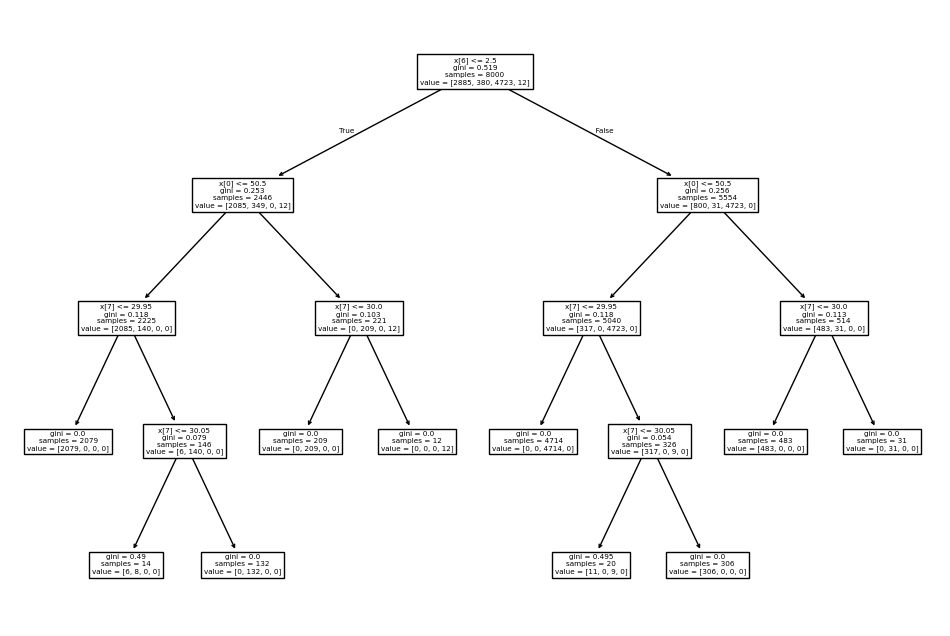

In [66]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [67]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [68]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [69]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


### Visualize decision-trees

[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [2885, 380, 4723, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [2085, 349, 0, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [2085, 140, 0, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [2079, 0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [6, 140, 0, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 209, 0, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 209, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [800, 31, 4723, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [317, 0, 4723, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

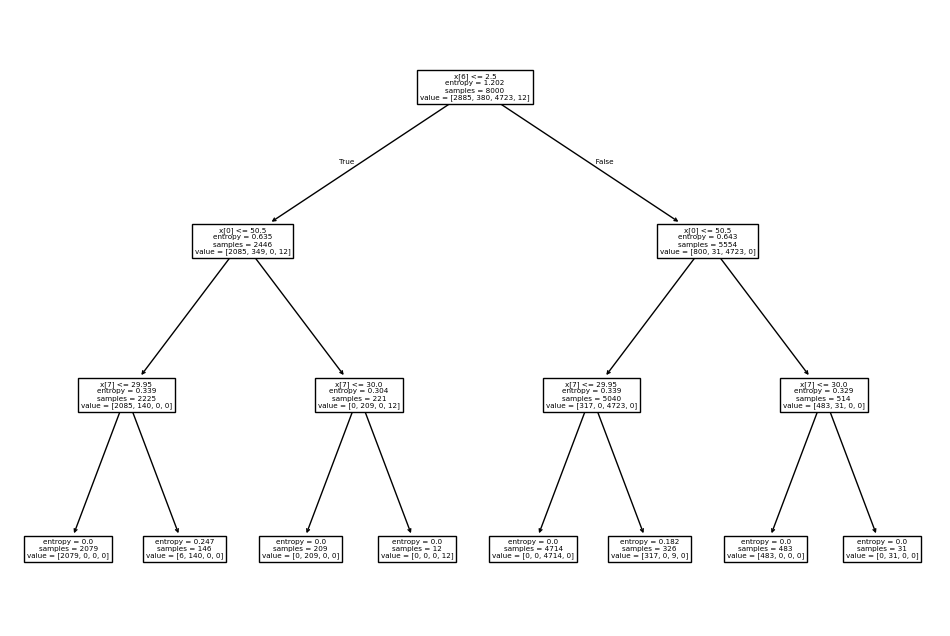

In [70]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [71]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [72]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [73]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8575


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [74]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00      1218
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [75]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00      1218
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [76]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       694
           2       0.75      0.14      0.24        83
           3       0.85      1.00      0.92      1218
           4       0.00      0.00      0.00         5

    accuracy                           0.86      2000
   macro avg       0.62      0.46      0.49      2000
weighted avg       0.85      0.86      0.84      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


gender_map = 'Male': 1, 'Female': 2, 'Other': 3

country_map =
 'Australia': 1,
 'Belgium': 2,
 'Brazil': 3,
 'Canada': 4,
 'China': 5,
 'Finland': 6,
 'France': 7,
 'Germany': 8,
 'India': 9,
 'Italy': 10,
 'Japan': 11,
 'Mexico': 12,
 'Netherlands': 13,
 'Norway': 14,
 'South Korea': 15,
 'Spain': 16,
 'Sweden': 17,
 'Switzerland': 18,
 'UK': 19,
 'USA': 20

sleep_quality_map = 'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4

stress_level_map = 'Low': 1, 'Medium': 2, 'High': 3

occupation_map =
 'Healthcare': 1,
 'Office': 2,
 'Other': 3,
 'Service': 4,
 'Student': 5

health_issues_map =
 'Mild': 1,
 'Moderate': 2,
 'None': 3,
 'Severe': 4


In [88]:
# Make a prediction with the gini index model

input_data = {
    'age': 28,
    'gender': 1,
    'country': 3,
    'occupation': 5,
    'daily_coffee_intake': 3,
    'caffeine_level_mg': 280,
    'sleep_duration_hrs': 5,
    'sleep_quality': 1,
    'BMI': 25.4,
    'heart_Rate': 85,
    'stress_level': 3,
    'physical_activity': 2,
    'smoking': 1,
    'alcohol_consumption': 1
}
# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])
# pastikan input_df punya semua kolom
input_df = input_df.reindex(columns=X.columns, fill_value=0)

# prediksi
prediction_gini = clf_gini.predict(input_df)


# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])

# To get the inverse, we can use the class_map to get the original label
# This was already done in the previous step to print the predicted class.
# class_map = {'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}
# class_map.items() → mengembalikan pasangan (key, value) misalnya ('unacc',1).
# {v:k for k,v in class_map.items()} → menukar posisi key & value.
# inv_class_map = {1: 'unacc', 2: 'acc', 3: 'good', 4: 'vgood'}

# reverse dictionary
inverse_prediction_gini = {v:k for k,v in health_issues_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction: 1
The predicted class for the given input using the gini index model is: Mild
